In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import datetime
import pydotplus 
import graphviz
warnings.filterwarnings('ignore')
# 显示最大列数
pd.set_option('max_columns',120)
# sns.set(style="darkgrid", font_scale=1.2)
plt.rcParams["font.family"] = "SimHei"
# 解决中文乱码问题
plt.rcParams["axes.unicode_minus"] = False

### 1.加载数据集

In [2]:
train = pd.read_csv('./data/train.csv')
testA = pd.read_csv("./data/testA.csv")
display(train.shape,testA.shape)

(800000, 47)

(200000, 46)

In [3]:
# 训练集、测试集合并
all_data = train.append(testA)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     999999 non-null   float64
 8   employmentLength    941459 non-null   object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  isDefault           800000 non-null   float64
 14  purpose             1000000 non-null  int64  
 15  postCode        

In [4]:
# 数据的纵向合并，vstack()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [5]:
train.isnull().any()

id                    False
loanAmnt              False
term                  False
interestRate          False
installment           False
grade                 False
subGrade              False
employmentTitle        True
employmentLength       True
homeOwnership         False
annualIncome          False
verificationStatus    False
issueDate             False
isDefault             False
purpose               False
postCode               True
regionCode            False
dti                    True
delinquency_2years    False
ficoRangeLow          False
ficoRangeHigh         False
openAcc               False
pubRec                False
pubRecBankruptcies     True
revolBal              False
revolUtil              True
totalAcc              False
initialListStatus     False
applicationType       False
earliesCreditLine     False
title                  True
policyCode            False
n0                     True
n1                     True
n2                     True
n3                  

In [19]:
train.tail()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
799995,799995,25000.0,3,14.49,860.41,C,C4,2659.0,7 years,1,72000.0,0,2016-07-01,0,0,242.0,8,19.03,0.0,710.0,714.0,14.0,0.0,0.0,9933.0,46.4,15.0,1,0,Aug-2011,0.0,1.0,0.0,5.0,10.0,10.0,6.0,6.0,2.0,12.0,13.0,10.0,14.0,0.0,0.0,0.0,3.0
799996,799996,17000.0,3,7.90,531.94,A,A4,29205.0,10+ years,0,99000.0,2,2013-04-01,0,4,563.0,10,15.72,1.0,720.0,724.0,7.0,0.0,0.0,20472.0,98.4,42.0,0,0,May-1989,33369.0,1.0,0.0,2.0,2.0,2.0,2.0,15.0,16.0,2.0,19.0,2.0,7.0,0.0,0.0,0.0,0.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,65000.0,2,2015-10-01,1,0,47.0,17,12.11,1.0,670.0,674.0,5.0,0.0,0.0,6381.0,51.9,36.0,1,0,Jul-2002,0.0,1.0,2.0,1.0,4.0,4.0,1.0,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,96000.0,2,2015-02-01,0,4,34.0,18,29.25,0.0,675.0,679.0,16.0,0.0,0.0,69702.0,61.3,37.0,1,0,Jan-1994,4.0,1.0,0.0,5.0,8.0,8.0,7.0,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,120000.0,0,2018-08-01,0,4,62.0,13,8.99,0.0,695.0,699.0,7.0,0.0,0.0,8420.0,72.6,13.0,0,0,Feb-2002,4.0,1.0,2.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [21]:
train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,799761.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799595.000000,8.000000e+05,799469.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.0,759730.000000,759730.000000,759730.000000,759730.000000,766761.000000,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,1754.113589,1.0,0.511932,3.642330,5.642648,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,2.367453,200.037446,11.036679,11.150155,0.880325,31.865995,31.866674,5.475286,0.606467,0.377471,2.245802e+04,24.516126,11.999201,0.493055,0.137464,7941.474040,0.0,1.333266,2.246825,3.302810,3.302810,2.949969,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,0.000000,103.000000,8.000000,11.790000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.944000e+03,33.400000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,203.000000,14.000000,17.610000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.973400e+04,70.700000,32.000000,1.000000,0.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,86.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,1.0,51.000000,33.000000,63.000000,63.000000,49.000000,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


### 2.数据预处理(EDA)

#### 缺失值处理

In [4]:
is_counts = train.isDefault.value_counts()

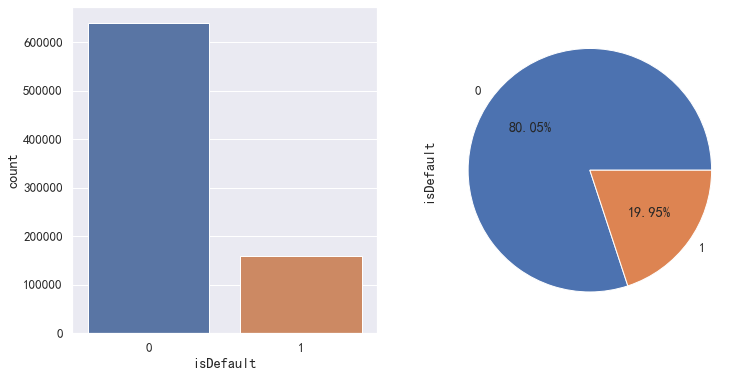

In [28]:
# 探索性数据分析
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
train.groupby("isDefault").sum()["loanAmnt"]
sns.countplot(x="isDefault",data = train,ax=ax)

ax = plt.subplot(1,2,2)
is_counts.plot(kind = 'pie',ax=ax,autopct = '%0.2f%%')

#### 可以明显看出违约人数占比五分之一左右，预测的违约人数也应该差不多比例

#### 数据类型转换

In [4]:
# 把非数值类型变量转换为数值类型变量
not_number = []
number = []
for k,v in train.dtypes.items():
#     print(k,v)
    if not np.issubdtype(v,np.number):
        not_number.append(k)
    elif np.issubdtype(v,np.number):
        number.append(k)
print("非数值类型变量",not_number)
print("数值类型变量",number)

非数值类型变量 ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']
数值类型变量 ['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


In [9]:
# 打印类别类型变量的取值
for column in not_number:
    print(data[column].value_counts())

B    292055
C    283819
A    174588
D    149377
E     69671
F     23751
G      6739
Name: grade, dtype: int64
C1    63620
B4    61939
B5    61365
B3    60700
C2    58859
C3    55769
C4    55382
B2    55125
B1    52926
C5    50189
A5    47674
A4    38681
D1    38205
D2    33241
A1    32307
D3    29231
A3    28299
A2    27627
D4    26375
D5    22325
E1    17591
E2    15921
E3    13705
E4    11687
E5    10767
F1     7387
F2     5413
F3     4483
F4     3573
F5     2895
G1     2247
G2     1556
G3     1210
G4      917
G5      809
Name: subGrade, dtype: int64
10+ years    328525
2 years       90565
< 1 year      80226
3 years       80163
1 year        65671
5 years       62645
4 years       59818
6 years       46582
8 years       45168
7 years       44230
9 years       37866
Name: employmentLength, dtype: int64
2016-03-01    36542
2015-10-01    31918
2015-07-01    30590
2015-12-01    28966
2014-10-01    26768
              ...  
2007-08-01       27
2007-07-01       25
2008-09-01       24
2007

In [5]:
for data in (train,testA):
    miss = data.isnull().sum(axis=0)
    miss = pd.concat([miss,miss * 100 / data.shape[0]],axis = 1)
    miss.columns = ['miss_num','miss_rate']
    miss.sort_values('miss_num',ascending=False,inplace=True)
    miss 

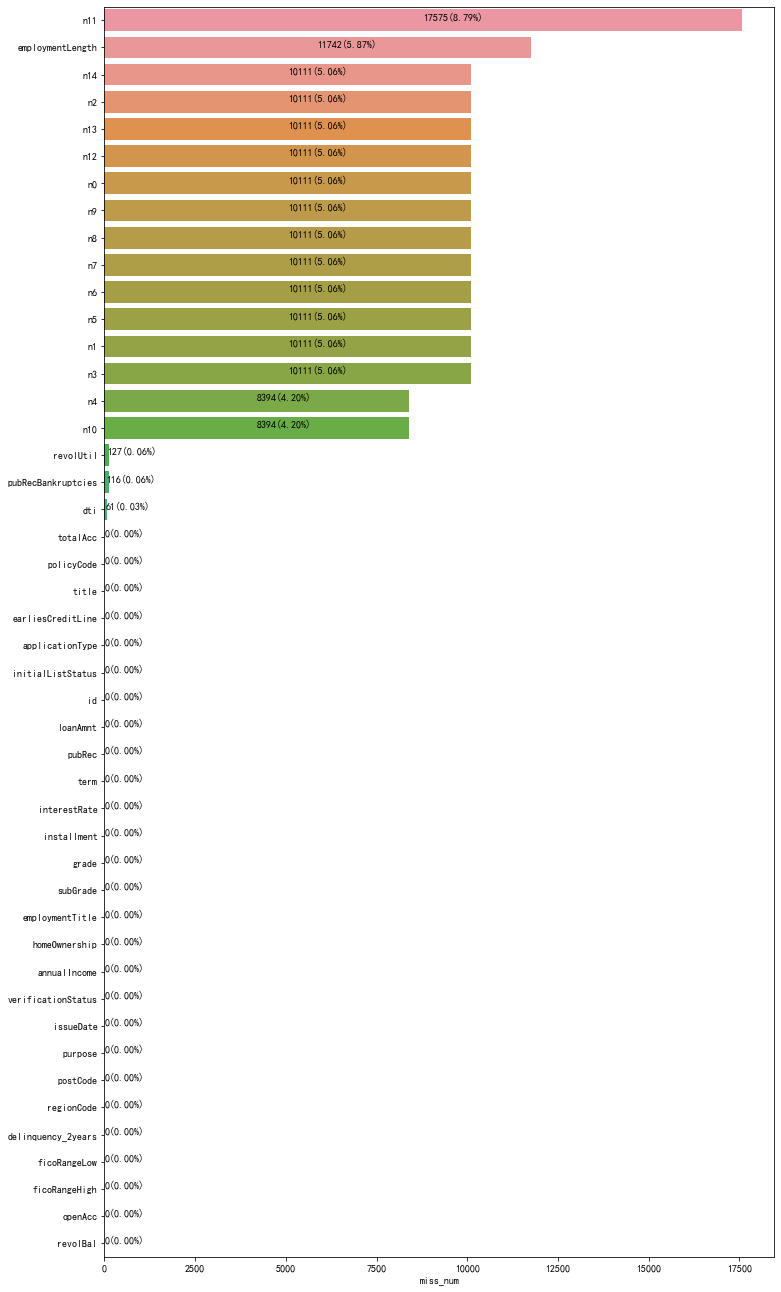

In [6]:
# 缺失值的可视化
ax = sns.barplot(y=miss.index,x=miss['miss_num'])
figsize = (12,miss.shape[0]//2)
ax.get_figure().set_size_inches(figsize)

for i in range(miss.shape[0]):
    num = miss["miss_num"].iloc[i]
    rate = miss["miss_rate"].iloc[i]
    ax.text(num / 2, i, f"{num}({rate:.2f}%)")

In [7]:
## 缺失值少于10%
miss_less = miss[(miss['miss_rate'] <10)&(miss['miss_rate']>0)].index
print(miss_less)

Index(['n11', 'employmentLength', 'n14', 'n2', 'n13', 'n12', 'n0', 'n9', 'n8',
       'n7', 'n6', 'n5', 'n1', 'n3', 'n4', 'n10', 'revolUtil',
       'pubRecBankruptcies', 'dti'],
      dtype='object')


In [8]:
# 查看各个字段中数值的分布情况
for column in data.columns:
    print("{} 的取值总共有 {} 种".format(column, data[column].nunique()))
#     print(data[i].value_counts())

id 的取值总共有 200000 种
loanAmnt 的取值总共有 1444 种
term 的取值总共有 2 种
interestRate 的取值总共有 597 种
installment 的取值总共有 41575 种
grade 的取值总共有 7 种
subGrade 的取值总共有 35 种
employmentTitle 的取值总共有 79282 种
employmentLength 的取值总共有 11 种
homeOwnership 的取值总共有 6 种
annualIncome 的取值总共有 15530 种
verificationStatus 的取值总共有 3 种
issueDate 的取值总共有 138 种
purpose 的取值总共有 14 种
postCode 的取值总共有 889 种
regionCode 的取值总共有 51 种
dti 的取值总共有 4816 种
delinquency_2years 的取值总共有 23 种
ficoRangeLow 的取值总共有 39 种
ficoRangeHigh 的取值总共有 39 种
openAcc 的取值总共有 66 种
pubRec 的取值总共有 22 种
pubRecBankruptcies 的取值总共有 10 种
revolBal 的取值总共有 46395 种
revolUtil 的取值总共有 1145 种
totalAcc 的取值总共有 113 种
initialListStatus 的取值总共有 2 种
applicationType 的取值总共有 2 种
earliesCreditLine 的取值总共有 668 种
title 的取值总共有 12058 种
policyCode 的取值总共有 1 种
n0 的取值总共有 30 种
n1 的取值总共有 28 种
n2 的取值总共有 42 种
n3 的取值总共有 42 种
n4 的取值总共有 45 种
n5 的取值总共有 56 种
n6 的取值总共有 86 种
n7 的取值总共有 58 种
n8 的取值总共有 87 种
n9 的取值总共有 39 种
n10 的取值总共有 65 种
n11 的取值总共有 4 种
n12 的取值总共有 4 种
n13 的取值总共有 22 种
n14 的取值总共有 27 种


In [9]:
train["isDefault"].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

#### 数据转换(数据类型分析)

In [ ]:
# 数值型数据分析
# 1.连续型数据  2.离散型数据 （数据量小于10）
# 类别型数据分析

In [10]:
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        # 数据量小于10，判定为离散性数据变量
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        # 连续性数据变量
        numerical_serial_fea.append(fea)
    return numerical_noserial_fea, numerical_serial_fea

numerical_noserial_fea, numerical_serial_fea = get_numerical_serial_fea(train,number)

In [11]:
print("离散型变量：",numerical_noserial_fea,"\n连续型变量：" ,numerical_serial_fea)

离散型变量： ['term', 'homeOwnership', 'verificationStatus', 'isDefault', 'initialListStatus', 'applicationType', 'policyCode', 'n11', 'n12'] 
连续型变量： ['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']


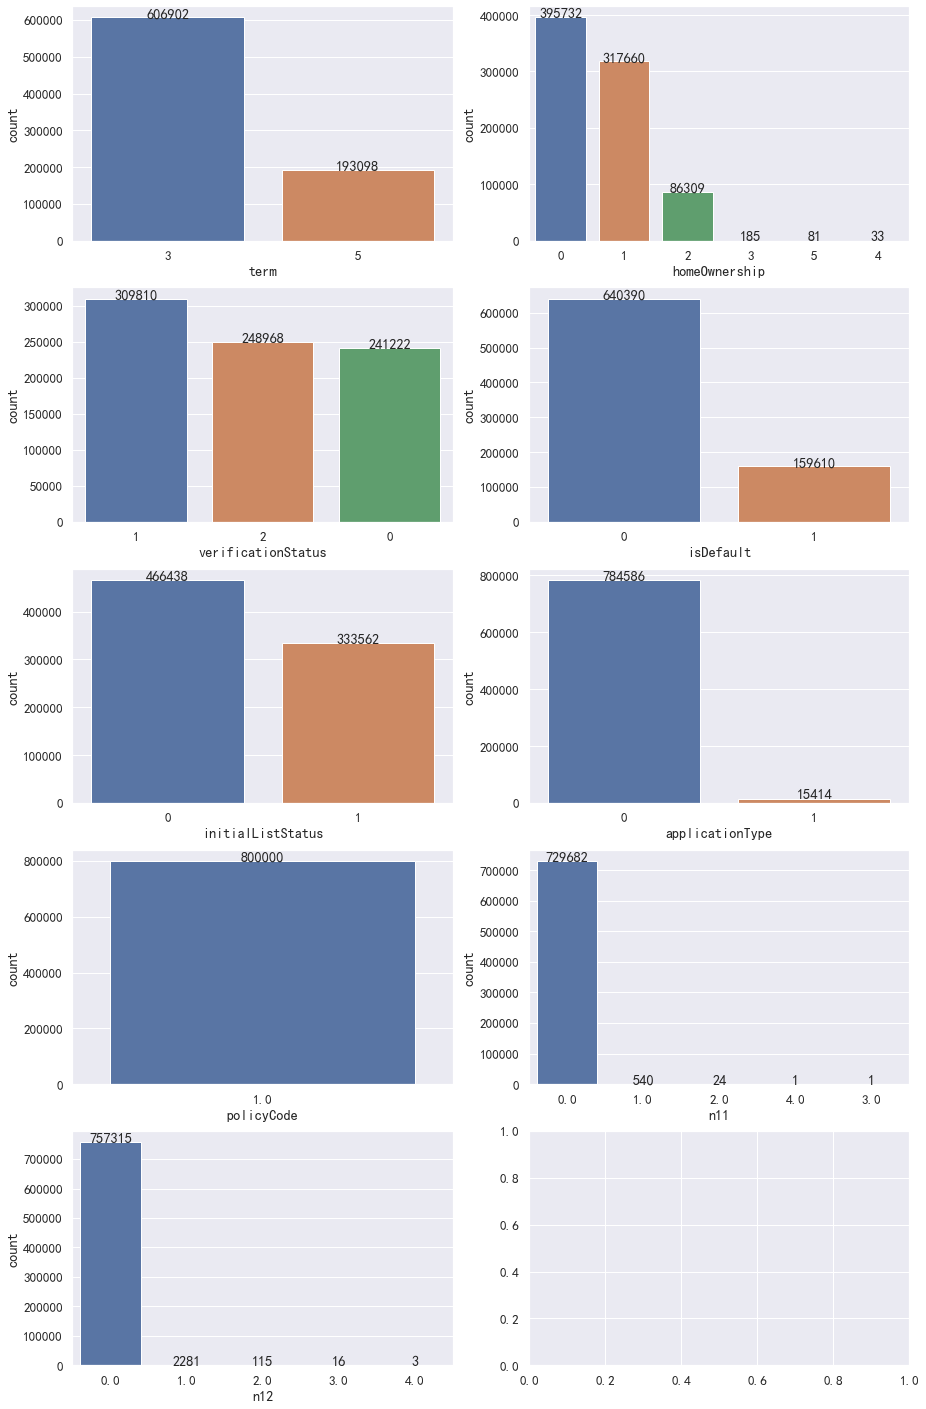

In [12]:
# 绘制离散性数据变量 用条形图来统计 连续型变量用数据分布图来展现
def plot_var(name_list,data):
    """绘制变量的每个类别的数量。
    Parameters
    ----------
    name : str
    变量的名称。
    data : dataframe
    表结构
    """
    num = len(name_list)
    row, col = np.ceil(num / 2).astype(np.int32), 2
    fig, ax = plt.subplots(row, col)
    fig.set_size_inches(15, row * 5)
    ax = ax.ravel()
    for index, name in enumerate(name_list):
        v = data[name].value_counts()
        sns.countplot(x=name, data=data, order=v.index, ax=ax[index])
    # 在图像上绘制数值。
        for x, y in enumerate(v):
            t = ax[index].text(x, y, y)
            # 数值居中对齐。
            t.set_ha("center")
        if len(v) > 10:
            ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=90)
    
plot_var(numerical_noserial_fea,train)

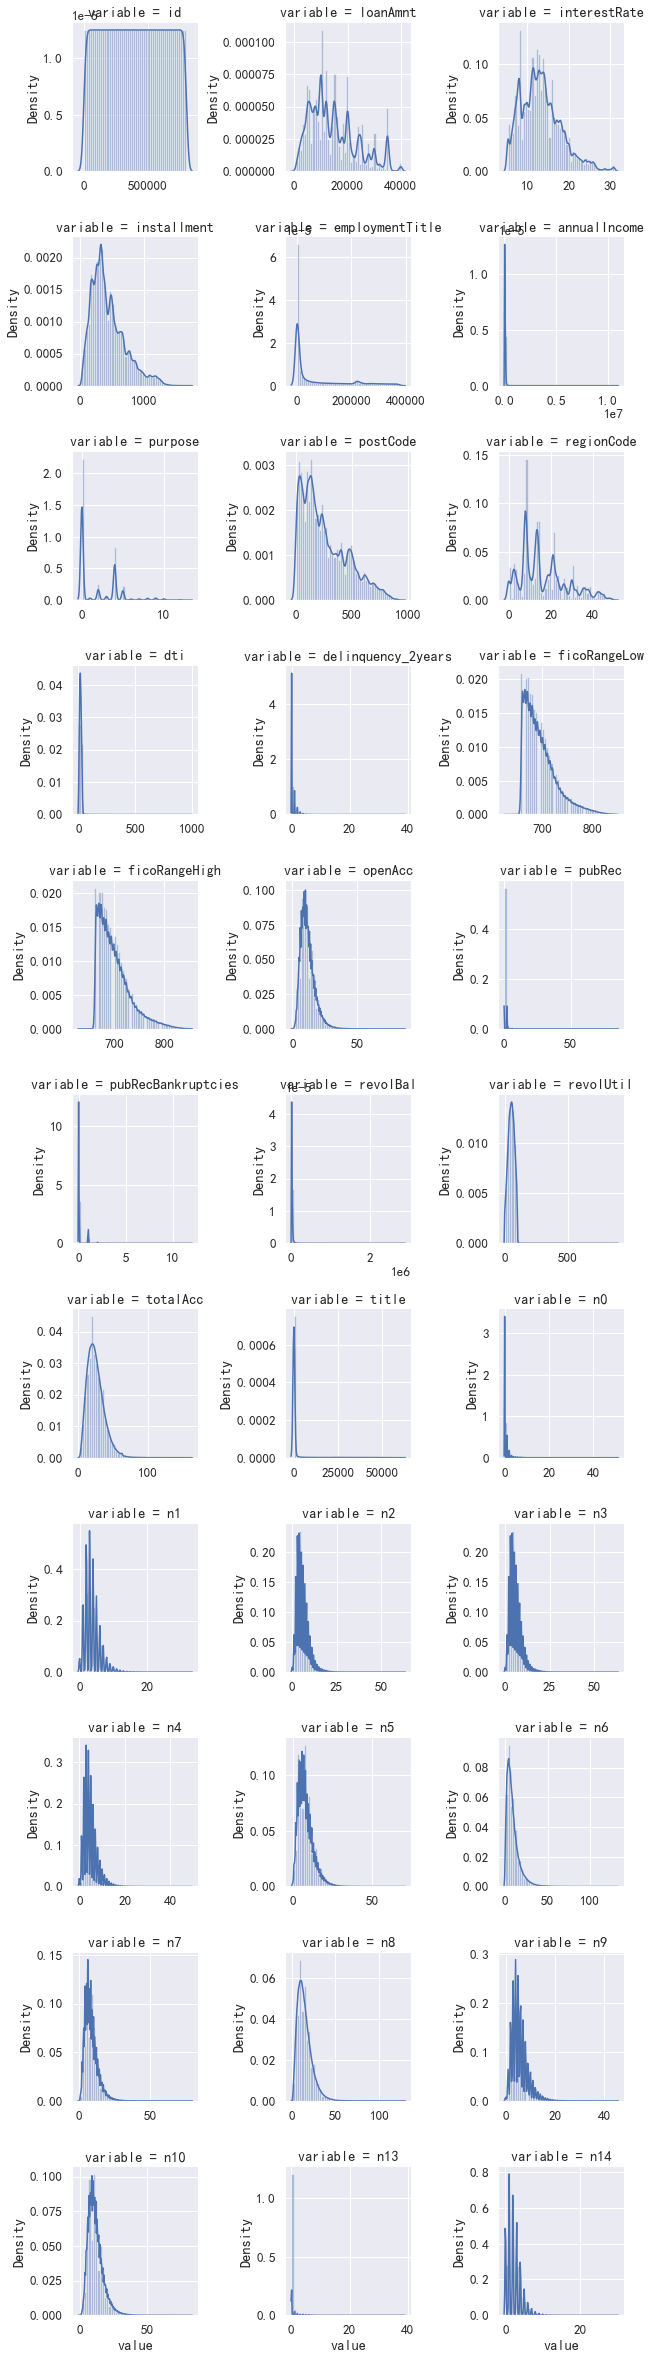

In [12]:
# 连续型变量用数据分布图来展示
f = pd.melt(train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

### 缺失值的处理

In [12]:
all_data[not_number].mode()

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
0,B,C1,10+ years,2016-03-01,Aug-2001


In [13]:
label = 'isDefault'
number.remove(label)

In [86]:
# 把缺失的（数据类型）数据使用中位数填充
# 类别类型使用众数填充(用众数填充不了)

In [14]:
# 数值类型变量缺失值填充
all_data[number] = all_data[number].fillna(all_data[number].median())

In [15]:
map_dict = {
    "10+ years": 10, "9 years": 9, "8 years": 8,
"7 years": 7, "6 years": 6, "5 years": 5,
"4 years": 4, "3 years": 3, "2 years": 2,
"1 year": 1, "< 1 year": 0
}

all_data['employmentLength'] = all_data['employmentLength'].map(map_dict)

In [16]:
all_data['employmentLength'] = all_data['employmentLength'].fillna(all_data['employmentLength'].median())

In [17]:
# 日期的转换
all_data['issueDate'] = pd.to_datetime(all_data['issueDate'],format="%Y-%m-%d")
startdate = datetime.datetime.strptime("2007-06-01", "%Y-%m-%d")
all_data['issueDateDT'] = all_data['issueDate'].apply(lambda x: x-startdate).dt.days

In [18]:
map_dict = {
    'A':1,'B':2,'C':3,'D':4,'E':5
}
all_data['grade'] = all_data['grade'].map(map_dict)

In [19]:
all_data['grade'].fillna(all_data['grade'].median(),inplace=True)

In [20]:
all_data["earliesCreditLine"] = all_data["earliesCreditLine"].apply(lambda x:int(x[-4:]))

In [21]:
data_train = all_data[:800000]
data_testA = all_data[800000:]

### 特征选择

In [98]:
data_train.isDefault.value_counts()

0.0    640390
1.0    159610
Name: isDefault, dtype: int64

In [99]:
cond0 = data_train.isDefault == 0   #没有违约的
cond1 = data_train.isDefault == 1   # 已经违约的

In [145]:
loanAmnt_0 = data_train.loanAmnt[cond0]
loanAmnt_1 = data_train.loanAmnt[cond1]

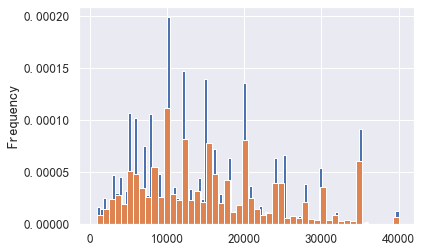

In [161]:
loanAmnt_0.plot(kind='hist',bins=100,density=True)
loanAmnt_1.plot(kind='hist',bins=50,density=True)

In [131]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'issueDateDT'],
      dtype='object')

In [165]:
new_columns = ['loanAmnt', 'term', 'interestRate', 'installment', 'grade',
        'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'purpose', 'postCode', 'regionCode',
       'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'issueDateDT']
len(new_columns)

44

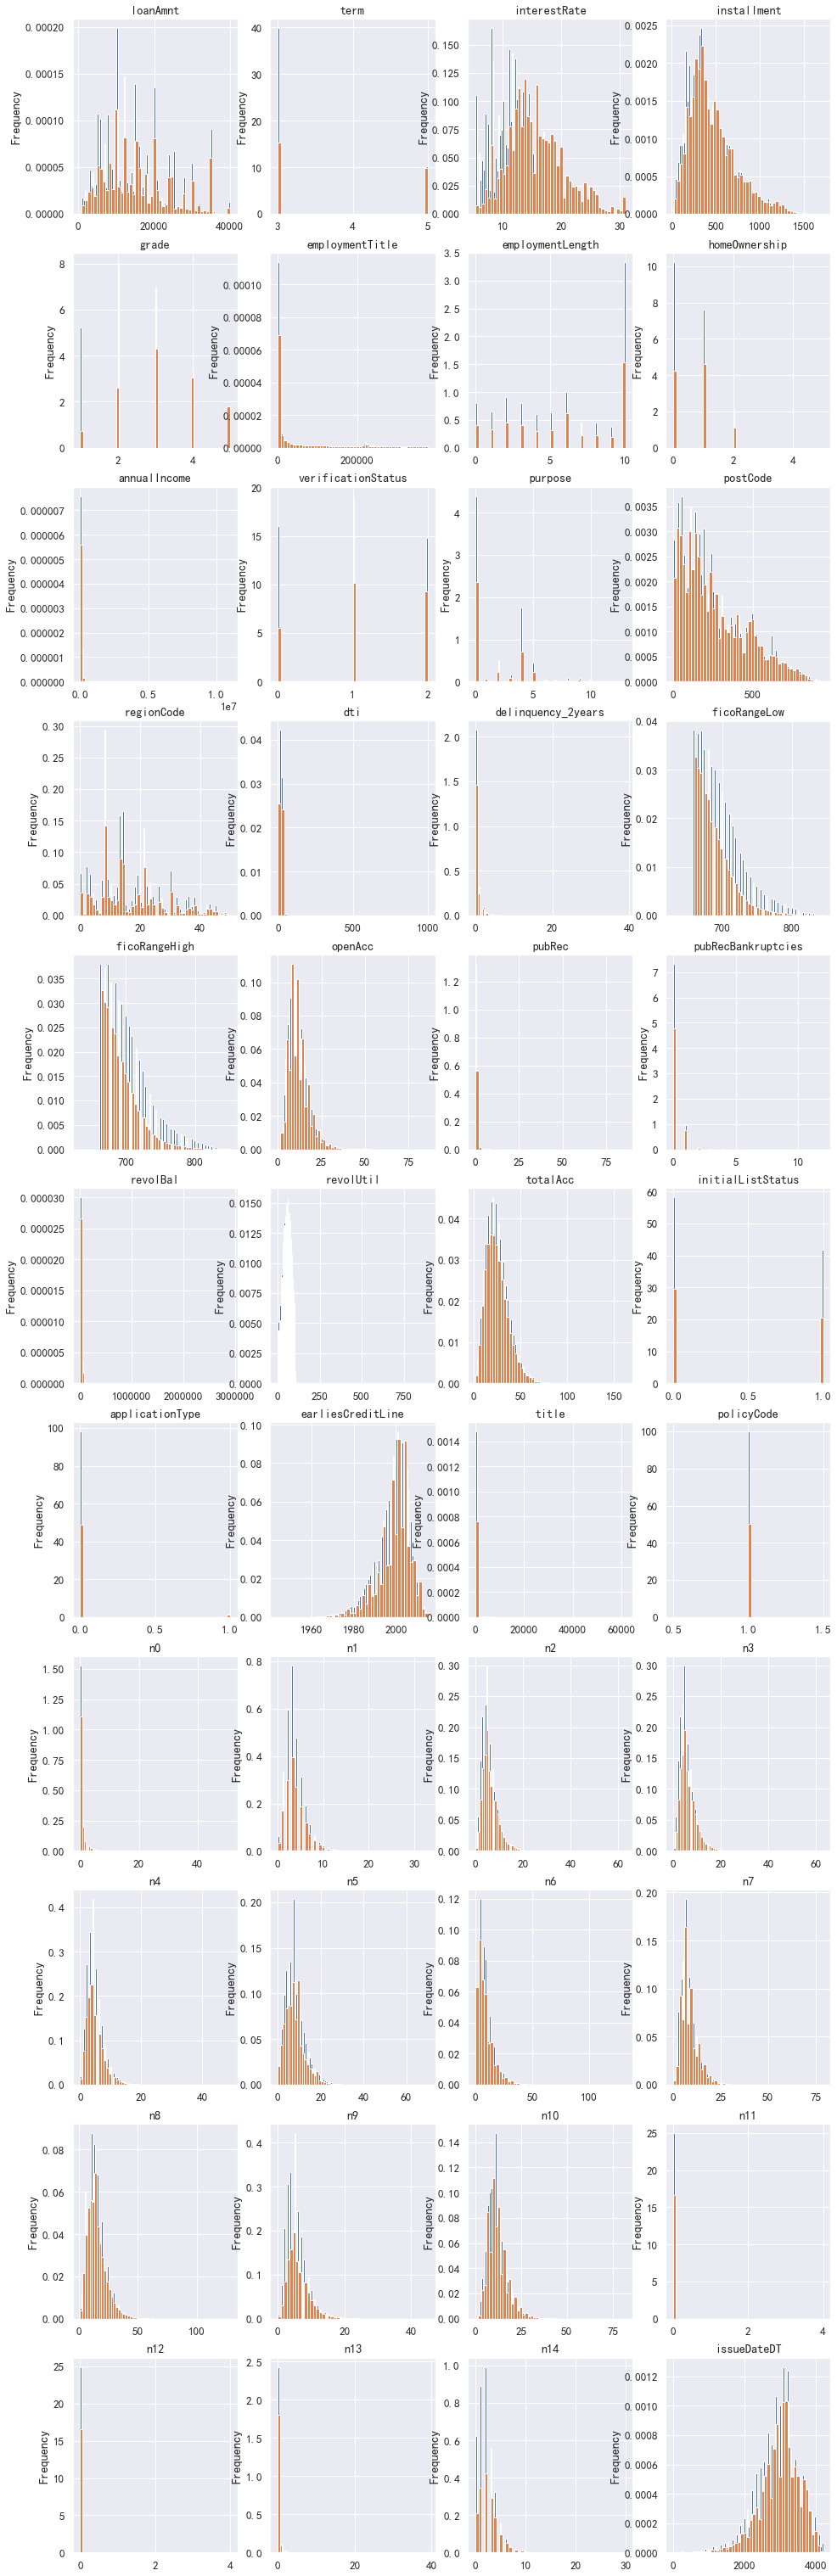

In [168]:
plt.figure(figsize=(4*4,12*5))

for i,col in enumerate(new_columns):
    loanAmnt_0 = data_train.loc[cond0,col]
    loanAmnt_1 = data_train.loc[cond1,col]
    
    axes = plt.subplot(12, 4, i+1)
    loanAmnt_0.plot(kind='hist',bins=100,density=True)
    loanAmnt_1.plot(kind='hist',bins=50,density=True)
    
    axes.set_title(col)

In [23]:
## 删除特征
columns = ['id','subGrade','issueDate','employmentTitle','openAcc','totalAcc',
          'policyCode','n2','n3','issueDateDT']
data_train.drop(columns=columns,inplace=True)

### 进行特征缩放

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
data_train.describe()

,loanAmnt,term,interestRate,installment,grade,employmentLength,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,pubRec,pubRecBankruptcies,revolBal,revolUtil,initialListStatus,applicationType,earliesCreditLine,title,n0,n1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,14416.818875,3.482745,13.238391,437.947723,2.647204,5.967240,0.614213,7.613391e+04,1.009683,0.199513,1.745982,258.535579,16.385758,18.284359,0.318239,696.204081,700.204226,0.214915,0.134095,1.622871e+04,51.791005,0.416953,0.019267,1998.687231,1754.111398,0.486162,3.609996,4.705076,8.052166,8.496662,8.218372,14.540814,5.562527,11.617142,0.000744,0.003214,0.084867,2.169615
std,8716.086178,0.855832,4.765757,261.460393,1.137354,3.580803,0.675749,6.894751e+04,0.782716,0.399634,2.367453,200.037331,11.036679,11.148495,0.880325,31.865995,31.866674,0.606467,0.377387,2.245802e+04,24.507991,0.493055,0.137464,7.606971,7941.469319,1.304088,2.194045,2.891763,4.683129,7.220096,4.454236,7.925421,3.136866,5.370503,0.028735,0.060464,0.496475,1.797781
min,500.000000,3.000000,5.310000,15.690000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,3.000000,9.750000,248.450000,2.000000,3.000000,0.000000,4.560000e+04,0.000000,0.000000,0.000000,103.000000,8.000000,11.800000,0.000000,670.000000,674.000000,0.000000,0.000000,5.944000e+03,33.500000,0.000000,0.000000,1995.000000,0.000000,0.000000,2.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,12000.000000,3.000000,12.740000,375.135000,3.000000,6.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,203.000000,14.000000,17.620000,0.000000,690.000000,694.000000,0.000000,0.000000,1.113200e+04,52.200000,0.000000,0.000000,2000.000000,1.000000,0.000000,3.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,20000.000000,3.000000,15.990000,580.710000,3.000000,10.000000,1.000000,9.000000e+04,2.000000,0.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,0.000000,0.000000,1.973400e+04,70.700000,1.000000,0.000000,2004.000000,5.000000,0.000000,5.000000,6.000000,10.000000,11.000000,10.000000,18.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,40000.000000,5.000000,30.990000,1715.420000,5.000000,10.000000,5.000000,1.099920e+07,2.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,86.000000,12.000000,2.904836e+06,892.300000,1.000000,1.000000,2015.000000,61680.000000,51.000000,33.000000,49.000000,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [29]:
## loanAmnt  annualIncome
scaler = StandardScaler()
columns = ['title','earliesCreditLine','loanAmnt','installment','annualIncome']
for column in columns:
    data_train[column] = scaler.fit_transform(data_train[[column]])

In [255]:
# 预测集进行数据缩放
data_testA.loanAmnt = scaler.fit_transform(data_testA[['loanAmnt']])

In [256]:
# 测试集进行处理
data_testA.annualIncome = scaler.fit_transform(data_testA[['annualIncome']])

### 对特征重要性进行排序，以进一步减少变量

In [30]:
# GBDT梯度提升决策树
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
target = data_train.isDefault.copy()
data = data_train.drop('isDefault',axis=1).copy()

In [33]:
gbdt = GradientBoostingClassifier()
%time gbdt.fit(data,target)

Wall time: 7min 12s


GradientBoostingClassifier()

In [34]:
importances = gbdt.feature_importances_
importances

array([1.63175978e-02, 8.74238966e-02, 2.84473096e-01, 1.53627397e-02,
       3.57544841e-01, 5.40189483e-03, 4.51982330e-02, 2.37332330e-02,
       5.46498548e-03, 0.00000000e+00, 3.85590585e-04, 1.37019444e-03,
       3.84444828e-02, 1.01077006e-03, 9.96217642e-03, 1.73869682e-02,
       5.66944499e-04, 7.55238148e-05, 1.21353274e-02, 2.82716908e-04,
       5.51470438e-04, 3.26346547e-04, 6.35396889e-03, 3.28962010e-02,
       5.41202399e-05, 3.45092738e-04, 3.12372038e-05, 3.67532221e-04,
       1.69870246e-03, 3.33574387e-05, 3.45235199e-03, 1.77639131e-02,
       1.47504231e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.34369890e-02])

In [37]:
len(data.columns)

37

In [35]:
np.argsort(importances)  # 升序排列
print(data.columns[np.argsort(importances)])
print(importances[np.argsort(importances)])

Index(['n12', 'n11', 'n13', 'purpose', 'n4', 'n7', 'n0', 'pubRecBankruptcies',
       'n10', 'revolUtil', 'applicationType', 'n1', 'n5', 'postCode',
       'initialListStatus', 'pubRec', 'delinquency_2years', 'regionCode', 'n6',
       'n8', 'employmentLength', 'verificationStatus', 'earliesCreditLine',
       'ficoRangeLow', 'revolBal', 'n14', 'installment', 'loanAmnt',
       'ficoRangeHigh', 'n9', 'annualIncome', 'title', 'dti', 'homeOwnership',
       'term', 'interestRate', 'grade'],
      dtype='object')
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.12372038e-05 3.33574387e-05 5.41202399e-05 7.55238148e-05
 1.47504231e-04 2.82716908e-04 3.26346547e-04 3.45092738e-04
 3.67532221e-04 3.85590585e-04 5.51470438e-04 5.66944499e-04
 1.01077006e-03 1.37019444e-03 1.69870246e-03 3.45235199e-03
 5.40189483e-03 5.46498548e-03 6.35396889e-03 9.96217642e-03
 1.21353274e-02 1.34369890e-02 1.53627397e-02 1.63175978e-02
 1.73869682e-02 1.77639131e-02 2.37332330e-02 3.28962010e

In [36]:
print(data.columns[np.argsort(importances)][::-1])
print(importances[np.argsort(importances)][::-1])

Index(['grade', 'interestRate', 'term', 'homeOwnership', 'dti', 'title',
       'annualIncome', 'n9', 'ficoRangeHigh', 'loanAmnt', 'installment', 'n14',
       'revolBal', 'ficoRangeLow', 'earliesCreditLine', 'verificationStatus',
       'employmentLength', 'n8', 'n6', 'regionCode', 'delinquency_2years',
       'pubRec', 'initialListStatus', 'postCode', 'n5', 'n1',
       'applicationType', 'revolUtil', 'n10', 'pubRecBankruptcies', 'n0', 'n7',
       'n4', 'purpose', 'n13', 'n11', 'n12'],
      dtype='object')
[3.57544841e-01 2.84473096e-01 8.74238966e-02 4.51982330e-02
 3.84444828e-02 3.28962010e-02 2.37332330e-02 1.77639131e-02
 1.73869682e-02 1.63175978e-02 1.53627397e-02 1.34369890e-02
 1.21353274e-02 9.96217642e-03 6.35396889e-03 5.46498548e-03
 5.40189483e-03 3.45235199e-03 1.69870246e-03 1.37019444e-03
 1.01077006e-03 5.66944499e-04 5.51470438e-04 3.85590585e-04
 3.67532221e-04 3.45092738e-04 3.26346547e-04 2.82716908e-04
 1.47504231e-04 7.55238148e-05 5.41202399e-05 3.33574387e

In [38]:
len(data.columns)//2

18

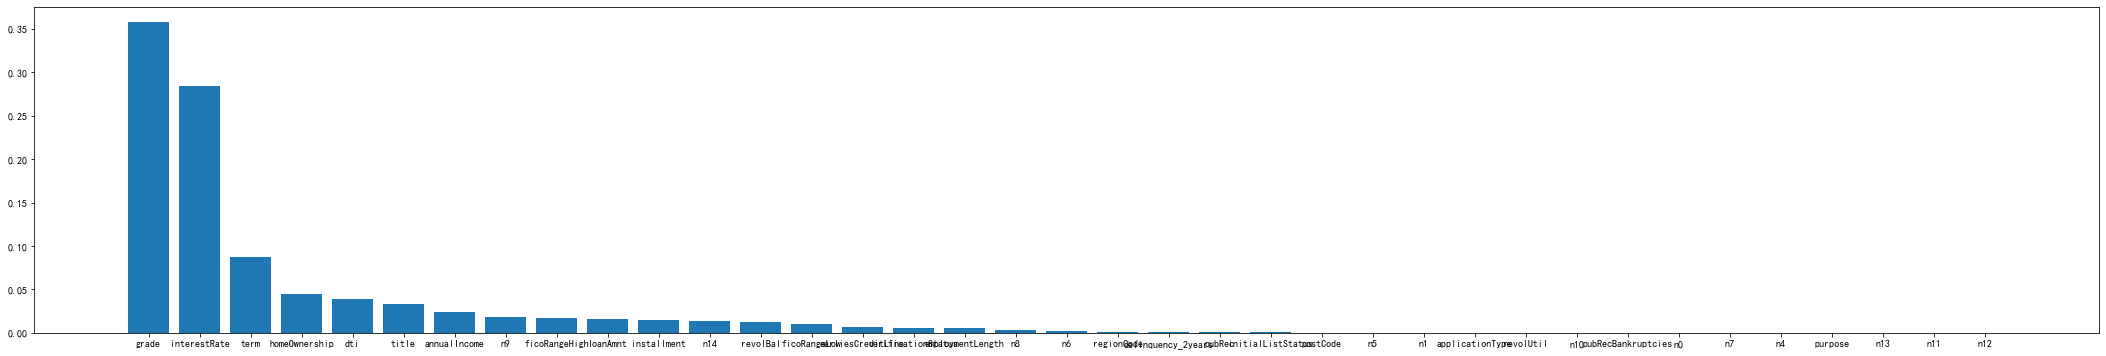

In [41]:
# 画图
plt.figure(figsize=(len(data.columns), 6))

plt.bar(np.arange(37), importances[np.argsort(importances)][::-1]) 
_ = plt.xticks(np.arange(37),data.columns[np.argsort(importances)][::-1] )

In [42]:
## 去除特征重要性很低的特征
drop_columns = ['pubRec', 'initialListStatus', 'postCode', 'n5', 'n1',
       'applicationType', 'revolUtil', 'n10', 'pubRecBankruptcies', 'n0', 'n7',
       'n4', 'purpose', 'n13', 'n11', 'n12']
data.drop(columns= drop_columns,inplace=True)

In [43]:
data.head()

,loanAmnt,term,interestRate,installment,grade,employmentLength,homeOwnership,annualIncome,verificationStatus,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,revolBal,earliesCreditLine,title,n6,n8,n9,n14
0,2.361518,5,19.52,1.835928,5.0,2.0,2,0.491187,2,32,17.05,0.0,730.0,734.0,24178.0,0.304033,-0.220754,8.0,12.0,2.0,2.0
1,0.411100,5,18.49,0.091610,4.0,5.0,0,-0.437056,2,18,27.83,0.0,700.0,704.0,15096.0,0.435491,-0.003918,7.0,13.0,5.0,2.0
2,-0.277283,5,16.99,-0.534604,4.0,8.0,0,-0.030950,2,14,22.77,0.0,675.0,679.0,4606.0,0.961325,-0.220880,21.0,5.0,3.0,4.0
3,-0.392013,3,7.26,-0.370946,1.0,10.0,1,0.607217,1,11,17.21,0.0,685.0,689.0,9948.0,0.041116,-0.220376,4.0,21.0,6.0,1.0
4,-1.309857,3,12.99,-1.288447,3.0,6.0,1,-0.683621,2,21,32.16,0.0,690.0,694.0,2942.0,-2.850970,-0.219495,9.0,15.0,7.0,4.0


### 数据不平衡处理

In [44]:
## 处理样本不平衡问题
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [45]:
# 新的样本数据
data_sample,target_sample = smote.fit_resample(data,target)

In [229]:
(target_sample == 0).sum()

640390

In [230]:
(target_sample == 1).sum()

640390

### 数据建模

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(data_sample,target_sample,test_size=0.2)

In [48]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [49]:
lr.score(X_train,y_train)

0.6450873686347383

In [50]:
lr.score(X_test,y_test)

0.6472930557941254

### 利用GridSearchCV进行交叉验证和模型参数自动调优

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
lr = LogisticRegression()
param_grid = {
    'C':[0.1,1,10],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

gv = GridSearchCV(lr, param_grid=param_grid, cv=5, n_jobs=8)
gv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [53]:
gv.best_params_

{'C': 1, 'solver': 'newton-cg'}

In [54]:
gv.score(X_train,y_train)

0.6825430596979966

In [55]:
gv.score(X_test,y_test)

0.6841963490997673

### 使用最佳参数进行预测

In [246]:
testA_columns = X_train.columns.tolist()

In [257]:
X_testA = data_testA[testA_columns]

In [ ]:
# 对测试数据集进行数据预处理

In [258]:
y_testA = gv.best_estimator_.predict(X_testA)
y_testA

array([1., 1., 1., ..., 0., 1., 0.])

In [259]:
result = testA[['id']]
result['isDefault'] = y_testA

0.0    127371
1.0     72629
Name: isDefault, dtype: int64

In [261]:
# 将结果集导出到表中
result.to_csv("result.csv")

### 类别类型变量使用独热编码处理

In [91]:
f_names = ['term', 'homeOwnership', 'verificationStatus', 'initialListStatus', 'applicationType',  'policyCode', 'n11', 'n12', 'subGrade']
for f_name in f_names:
    print(f_name,"类型数是：",all_data[f_name].nunique())

term 类型数是： 2
homeOwnership 类型数是： 6
verificationStatus 类型数是： 3
initialListStatus 类型数是： 2
applicationType 类型数是： 2
policyCode 类型数是： 1
n11 类型数是： 5
n12 类型数是： 5
subGrade 类型数是： 35


In [ ]:
['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'n11',
 'n12']

In [ ]:
### 那些类别类型变量使用独热编码处理

In [20]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [92]:
all_data.shape

(1000000, 48)

In [20]:
# drop_first 参数是删除掉原来的列
# 类型数在2以上的
data = pd.get_dummies(data,columns=['n11', 'n12', 'subGrade', 'homeOwnership', 'verificationStatus'],drop_first=True)

### 异常值的处理

In [25]:
# pd.cut() 这个函数用来分箱操作  (需要对连续变量离散化，特征离散化后，模型更稳定)
data_train = data[:800000]
data_testA = data[800000:]

In [26]:
def find_outliners_by_3segma(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliners_cut_off = 3*data_std
    lower_rule = data_mean - outliners_cut_off
    upper_rule = data_mean + outliners_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x<lower_rule or x>upper_rule else "正常值")
    return data

df_train = data_train.copy()
for fea in numerical_serial_fea:
    find_outliners_by_3segma(df_train,fea)
    print(df_train[fea+'_outliers'].value_counts())
    print(df_train.groupby(fea+'_outliers')['isDefault'].sum())    
    print('='*50)

正常值    800000
Name: id_outliers, dtype: int64
id_outliers
正常值    159610.0
Name: isDefault, dtype: float64
正常值    800000
Name: loanAmnt_outliers, dtype: int64
loanAmnt_outliers
正常值    159610.0
Name: isDefault, dtype: float64
正常值    794259
异常值      5741
Name: interestRate_outliers, dtype: int64
interestRate_outliers
异常值      2916.0
正常值    156694.0
Name: isDefault, dtype: float64
正常值    792046
异常值      7954
Name: installment_outliers, dtype: int64
installment_outliers
异常值      2152.0
正常值    157458.0
Name: isDefault, dtype: float64
正常值    800000
Name: employmentTitle_outliers, dtype: int64
employmentTitle_outliers
正常值    159610.0
Name: isDefault, dtype: float64
正常值    793973
异常值      6027
Name: annualIncome_outliers, dtype: int64
annualIncome_outliers
异常值       756.0
正常值    158854.0
Name: isDefault, dtype: float64
正常值    783003
异常值     16997
Name: purpose_outliers, dtype: int64
purpose_outliers
异常值      3635.0
正常值    155975.0
Name: isDefault, dtype: float64
正常值    798931
异常值      1069
Name

In [27]:
# 将异常值删除
for fea in numerical_serial_fea:
    df_train = df_train[df_train[fea+"_outliers"]=="正常值"]
df_train

,id,loanAmnt,term,interestRate,installment,grade,employmentTitle,employmentLength,annualIncome,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n13,n14,n11_1.0,n11_2.0,n11_3.0,n11_4.0,n12_1.0,n12_2.0,n12_3.0,n12_4.0,subGrade_A2,subGrade_A3,subGrade_A4,subGrade_A5,subGrade_B1,subGrade_B2,subGrade_B3,subGrade_B4,subGrade_B5,subGrade_C1,...,subGrade_D1,subGrade_D2,subGrade_D3,subGrade_D4,subGrade_D5,subGrade_E1,subGrade_E2,subGrade_E3,subGrade_E4,subGrade_E5,subGrade_F1,subGrade_F2,subGrade_F3,subGrade_F4,subGrade_F5,subGrade_G1,subGrade_G2,subGrade_G3,subGrade_G4,subGrade_G5,homeOwnership_1,homeOwnership_2,homeOwnership_3,homeOwnership_4,homeOwnership_5,verificationStatus_1,verificationStatus_2,id_outliers,loanAmnt_outliers,interestRate_outliers,installment_outliers,employmentTitle_outliers,annualIncome_outliers,purpose_outliers,postCode_outliers,regionCode_outliers,dti_outliers,delinquency_2years_outliers,ficoRangeLow_outliers,ficoRangeHigh_outliers,openAcc_outliers,pubRec_outliers,pubRecBankruptcies_outliers,revolBal_outliers,revolUtil_outliers,totalAcc_outliers,title_outliers,n0_outliers,n1_outliers,n2_outliers,n3_outliers,n4_outliers,n5_outliers,n6_outliers,n7_outliers,n8_outliers,n9_outliers,n10_outliers,n13_outliers,n14_outliers
0,0,35000.0,5,19.52,917.97,5.0,320.0,2.0,110000.0,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
1,1,18000.0,5,18.49,461.90,4.0,219843.0,5.0,46000.0,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,2002,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
2,2,12000.0,5,16.99,298.17,4.0,31698.0,8.0,74000.0,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
6,6,2050.0,3,7.69,63.95,1.0,180083.0,9.0,35000.0,2014-10-01,0.0,0,517.0,14,17.49,0.0,755.0,759.0,12.0,0.0,0.0,3111.0,8.5,23.0,0,0,2006,0.0,1.0,0.0,1.0,3.0,3.0,7.0,11.0,3.0,10.0,18.0,3.0,12.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
7,7,11500.0,3,14.98,398.54,3.0,214017.0,1.0,30000.0,2014-01-01,0.0,0,100.0,4,32.60,0.0,665.0,669.0,8.0,1.0,1.0,14021.0,59.7,33.0,1,0,1994,0.0,1.0,0.0,4.0,4.0,4.0,4.0,16.0,10.0,5.0,21.0,4.0,8.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [28]:
# 对grade进行值的填充
df_train['grade'] = df_train['grade'].fillna(df_train['grade'].median())

### 特征工程

In [29]:
df_train

,id,loanAmnt,term,interestRate,installment,grade,employmentTitle,employmentLength,annualIncome,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n13,n14,n11_1.0,n11_2.0,n11_3.0,n11_4.0,n12_1.0,n12_2.0,n12_3.0,n12_4.0,subGrade_A2,subGrade_A3,subGrade_A4,subGrade_A5,subGrade_B1,subGrade_B2,subGrade_B3,subGrade_B4,subGrade_B5,subGrade_C1,...,subGrade_D1,subGrade_D2,subGrade_D3,subGrade_D4,subGrade_D5,subGrade_E1,subGrade_E2,subGrade_E3,subGrade_E4,subGrade_E5,subGrade_F1,subGrade_F2,subGrade_F3,subGrade_F4,subGrade_F5,subGrade_G1,subGrade_G2,subGrade_G3,subGrade_G4,subGrade_G5,homeOwnership_1,homeOwnership_2,homeOwnership_3,homeOwnership_4,homeOwnership_5,verificationStatus_1,verificationStatus_2,id_outliers,loanAmnt_outliers,interestRate_outliers,installment_outliers,employmentTitle_outliers,annualIncome_outliers,purpose_outliers,postCode_outliers,regionCode_outliers,dti_outliers,delinquency_2years_outliers,ficoRangeLow_outliers,ficoRangeHigh_outliers,openAcc_outliers,pubRec_outliers,pubRecBankruptcies_outliers,revolBal_outliers,revolUtil_outliers,totalAcc_outliers,title_outliers,n0_outliers,n1_outliers,n2_outliers,n3_outliers,n4_outliers,n5_outliers,n6_outliers,n7_outliers,n8_outliers,n9_outliers,n10_outliers,n13_outliers,n14_outliers
0,0,35000.0,5,19.52,917.97,5.0,320.0,2.0,110000.0,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
1,1,18000.0,5,18.49,461.90,4.0,219843.0,5.0,46000.0,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,2002,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
2,2,12000.0,5,16.99,298.17,4.0,31698.0,8.0,74000.0,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
6,6,2050.0,3,7.69,63.95,1.0,180083.0,9.0,35000.0,2014-10-01,0.0,0,517.0,14,17.49,0.0,755.0,759.0,12.0,0.0,0.0,3111.0,8.5,23.0,0,0,2006,0.0,1.0,0.0,1.0,3.0,3.0,7.0,11.0,3.0,10.0,18.0,3.0,12.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
7,7,11500.0,3,14.98,398.54,3.0,214017.0,1.0,30000.0,2014-01-01,0.0,0,100.0,4,32.60,0.0,665.0,669.0,8.0,1.0,1.0,14021.0,59.7,33.0,1,0,1994,0.0,1.0,0.0,4.0,4.0,4.0,4.0,16.0,10.0,5.0,21.0,4.0,8.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值,正常值
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

#### 特征选择

In [34]:
new_column = []
for column in df_train.columns:
    if 'outliers' not in column:
        new_column.append(column)
    else:
        continue

### 数据标准化处理

In [31]:
df_train[new_column].describe()

,id,loanAmnt,term,interestRate,installment,grade,employmentTitle,employmentLength,annualIncome,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n13,n14,n11_1.0,n11_2.0,n11_3.0,n11_4.0,n12_1.0,n12_2.0,n12_3.0,n12_4.0,subGrade_A2,subGrade_A3,subGrade_A4,subGrade_A5,subGrade_B1,subGrade_B2,subGrade_B3,subGrade_B4,subGrade_B5,subGrade_C1,subGrade_C2,subGrade_C3,subGrade_C4,subGrade_C5,subGrade_D1,subGrade_D2,subGrade_D3,subGrade_D4,subGrade_D5,subGrade_E1,subGrade_E2,subGrade_E3,subGrade_E4,subGrade_E5,subGrade_F1,subGrade_F2,subGrade_F3,subGrade_F4,subGrade_F5,subGrade_G1,subGrade_G2,subGrade_G3,subGrade_G4,subGrade_G5,homeOwnership_1,homeOwnership_2,homeOwnership_3,homeOwnership_4,homeOwnership_5,verificationStatus_1,verificationStatus_2
count,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.0,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.0,625420.0,625420.0,625420.000000,625420.000000,625420.0,625420.0,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000,625420.000000
mean,399985.116055,14046.139234,3.484538,13.040041,423.868217,2.632031,69017.881943,5.913650,70777.638015,0.195846,1.576664,258.945390,16.380759,18.075821,0.200582,695.754909,699.754909,10.795315,0.176392,0.122985,14330.938897,52.831032,22.992451,0.410168,0.017017,1999.153436,482.929642,1.0,0.326940,3.420033,5.275496,5.275496,4.374748,7.431093,7.742357,7.651405,13.408348,5.249183,10.828912,0.035819,2.006719,0.000523,0.0,0.0,0.0,0.002315,0.000074,0.0,0.0,0.027455,0.028541,0.039780,0.049420,0.054156,0.056460,0.062131,0.063568,0.063533,0.065447,0.060351,0.056795,0.056249,0.050608,0.037644,0.032469,0.028298,0.025759,0.021685,0.017195,0.015580,0.013340,0.011210,0.010499,0.005942,0.004447,0.003591,0.002848,0.002045,0.001415,0.000902,0.000489,0.000291,0.000245,0.408866,0.106393,0.000238,0.000035,0.000101,0.395077,0.292718
std,230949.329222,8300.624076,0.856913,4.502159,242.337779,1.131741,103680.125727,3.578833,37726.890520,0.396851,2.080218,199.286889,11.012032,8.390323,0.477225,29.264178,29.264178,4.474603,0.414820,0.328420,12030.743615,23.948539,10.120033,0.491864,0.129336,7.478486,2662.286280,0.0,0.764079,1.848198,2.613593,2.613593,2.317160,3.908136,5.834304,3.591203,6.548386,2.585898,4.371304,0.185839,1.529082,0.022860,0.0,0.0,0.0,0.048061,0.008576,0.0,0.0,0.163406,0.166512,0.195441,0.216743,0.226325,0.230807,0.241394,0.243983,0.243920,0.247314,0.238137,0.231452,0.230401,0.219195,0.190333,0.177243,0.165822,0.158415,0.145652,0.129997,0.123844,0.114725,0.105283,0.101923,0.076853,0.066535,0.059819,0.053288,0.045176,0.037591,0.030016,0.022114,0.017056,0.015639,0.491625,0.308340,0.015433,0.005931,0.010036,0.488868,0.455011
min,0.000000,500.000000,3.000000,5.310000,15.690000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000

In [37]:
y = df_train['isDefault']
X = df_train[new_column].drop(['id','isDefault','issueDate'],axis=1)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### 建立模型

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [44]:
lr.score(x_test,y_test)

0.8064660548111668

### 模型评估

### 特征重要性选择

### 测试数据集处理

In [104]:
X_test_columns = df_train[new_column].drop(['id','isDefault','issueDate'],axis=1).columns

In [105]:
X_test = data_testA[X_test_columns]

In [106]:
X_test['grade'] = X_test['grade'].fillna(X_test['grade'].median())

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)

In [108]:
y_test = lr.predict(X_scaled)

In [110]:
data_testA["result"] = y_test

In [111]:
result=data_testA[["id","result"]]

In [115]:
result["result"].value_counts()

0.0    197126
1.0      2874
Name: result, dtype: int64

In [116]:
result.to_csv("./data/result2.csv")

### 进行结果预测

### 测试集数据预处理

In [130]:
testA.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      11742
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
purpose                   0
postCode                  0
regionCode                0
dti                      61
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      116
revolBal                  0
revolUtil               127
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
policyCode                0
n0                    10111
n1                    10111
n2                    10111
n3                    10111
n4                  

In [131]:
testA.drop(columns=['subGrade','employmentTitle','issueDate','postCode', 'regionCode','earliesCreditLine'],inplace=True)

In [132]:
testA

,id,loanAmnt,term,interestRate,installment,grade,employmentLength,homeOwnership,annualIncome,verificationStatus,purpose,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,10+ years,0,80000.0,0,0,10.56,1.0,715.0,719.0,17.0,0.0,0.0,9846.0,30.7,29.0,0,0,0.0,1.0,1.0,4.0,6.0,6.0,6.0,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,10+ years,0,50000.0,0,2,21.40,2.0,670.0,674.0,5.0,0.0,0.0,8946.0,56.6,14.0,0,0,5.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,2 years,1,60000.0,2,0,33.50,0.0,710.0,714.0,12.0,0.0,0.0,970.0,17.6,43.0,1,0,0.0,1.0,0.0,1.0,4.0,4.0,1.0,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,4 years,0,37000.0,1,4,13.95,0.0,685.0,689.0,10.0,1.0,1.0,10249.0,52.3,18.0,0,0,4.0,1.0,0.0,2.0,2.0,2.0,4.0,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,< 1 year,1,80000.0,1,0,24.97,0.0,685.0,689.0,19.0,0.0,0.0,33199.0,35.6,22.0,0,0,0.0,1.0,0.0,8.0,11.0,11.0,9.0,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,999995,7000.0,3,11.14,229.64,B,7 years,1,30000.0,2,4,32.92,0.0,685.0,689.0,8.0,0.0,0.0,5021.0,54.0,17.0,1,0,52663.0,1.0,0.0,2.0,2.0,2.0,2.0,6.0,11.0,2.0,6.0,2.0,8.0,0.0,0.0,0.0,4.0
199996,999996,6000.0,3,6.24,183.19,A,1 year,1,56000.0,0,0,20.38,0.0,720.0,724.0,25.0,0.0,0.0,10163.0,35.9,27.0,0,0,0.0,1.0,0.0,5.0,6.0,6.0,5.0,5.0,14.0,12.0,13.0,6.0,25.0,0.0,0.0,0.0,0.0
199997,999997,14000.0,5,15.88,339.57,C,8 years,2,80000.0,2,4,15.12,0.0,675.0,679.0,21.0,0.0,0.0,31401.0,86.0,63.0,0,0,4.0,1.0,0.0,7.0,13.0,13.0,9.0,21.0,18.0,21.0,42.0,13.0,21.0,0.0,0.0,0.0,0.0
199998,999998,8000.0,3,18.06,289.47,D,4 years,1,190000.0,0,0,9.33,0.0,690.0,694.0,11.0,0.0,0.0,28493.0,64.0,24.0,0,0,0.0,1.0,0.0,3.0,6.0,6.0,4.0,12.0,5.0,8.0,19.0,6.0,11.0,0.0,0.0,0.0,2.0


In [133]:
map_dict = {
    "10+ years": 10, "9 years": 9, "8 years": 8,
"7 years": 7, "6 years": 6, "5 years": 5,
"4 years": 4, "3 years": 3, "2 years": 2,
"1 year": 1, "< 1 year": 0
}
testA['employmentLength'] = testA['employmentLength'].map(map_dict)

In [134]:
map_dict = {
    'A':1,'B':2,'C':3,'D':4,'E':5
}
testA['grade'] = testA['grade'].map(map_dict)

### 缺失值的处理

In [135]:
miss = testA.isnull().sum(axis=0)
miss_rate = miss * 100 / testA.shape[0]
miss = pd.concat([miss,miss_rate],axis = 1)
miss.columns = ['miss_num','miss_rate']
miss.sort_values('miss_num',ascending=False,inplace=True)
miss

,miss_num,miss_rate
n11,17575,8.7875
employmentLength,11742,5.8710
n14,10111,5.0555
n7,10111,5.0555
n2,10111,5.0555
n3,10111,5.0555
n5,10111,5.0555
n6,10111,5.0555
n0,10111,5.0555
n8,10111,5.0555


In [136]:
missing_less = miss[(miss_rate<10)&(miss_rate)>0].index

In [138]:
testA.shape

(200000, 40)

#### 数据填充

In [144]:
missing_less

Index(['n11', 'employmentLength', 'n14', 'n7', 'n2', 'n3', 'n5', 'n6', 'n0',
       'n8', 'n9', 'n12', 'n13', 'n1', 'n10', 'n4', 'grade', 'revolUtil',
       'pubRecBankruptcies', 'dti'],
      dtype='object')

In [151]:
testA['n11'].value_counts()

0.0    182281
1.0       137
2.0         6
3.0         1
Name: n11, dtype: int64

In [156]:
for index in missing_less:
#     print(index)
    m = testA[index].median()
    testA[index].fillna(m,inplace=True)

In [157]:
testA.shape

(200000, 40)

In [158]:
testA.isnull().sum()

id                    0
loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
purpose               0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
title                 0
policyCode            0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9                    0
n10                   0
n11                   0
n12                   0
n13                   0
n14                   0
dtype: int64

In [160]:
testA.head()

,id,loanAmnt,term,interestRate,installment,grade,employmentLength,homeOwnership,annualIncome,verificationStatus,purpose,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,2.0,10.0,0,80000.0,0,0,10.56,1.0,715.0,719.0,17.0,0.0,0.0,9846.0,30.7,29.0,0,0,0.0,1.0,1.0,4.0,6.0,6.0,6.0,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,3.0,10.0,0,50000.0,0,2,21.40,2.0,670.0,674.0,5.0,0.0,0.0,8946.0,56.6,14.0,0,0,5.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,4.0,2.0,1,60000.0,2,0,33.50,0.0,710.0,714.0,12.0,0.0,0.0,970.0,17.6,43.0,1,0,0.0,1.0,0.0,1.0,4.0,4.0,1.0,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,3.0,4.0,0,37000.0,1,4,13.95,0.0,685.0,689.0,10.0,1.0,1.0,10249.0,52.3,18.0,0,0,4.0,1.0,0.0,2.0,2.0,2.0,4.0,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,4.0,0.0,1,80000.0,1,0,24.97,0.0,685.0,689.0,19.0,0.0,0.0,33199.0,35.6,22.0,0,0,0.0,1.0,0.0,8.0,11.0,11.0,9.0,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [165]:
X_testA = testA.drop(columns=['id'])
X_testA = scaler.fit_transform(X_testA)

In [180]:
y_testA = lr.predict(X_testA)

In [181]:
result = testA[['id']]
result['isDefault'] = y_testA

In [185]:
# 将文件导出到csv中
result.to_csv("./data/result.csv")